
# <center><h2>Pima Diabetes - Case Study</h2></center>

## Introduction
>The [Pima](https://en.wikipedia.org/wiki/Pima_people) are a group of **Native Americans** living in Arizona. A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. In the recent years, because of a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, made them develop **the highest prevalence of type 2 diabetes** and for this reason they have been subject of many studies.

## Dataset
The dataset includes data from **768** women with **8** characteristics, in particular:

* Number of times pregnant
* Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* Diastolic blood pressure (mm Hg)
* Triceps skin fold thickness (mm)
* 2-Hour serum insulin (mu U/ml)
* Body mass index (weight in kg/(height in m)^2)
* Diabetes pedigree function
* Age (years)

The last column (Outcome) of the dataset indicates if the person has been diagnosed with diabetes (1) or not (0)

Let's do Exploratory Data Analysis(EDA) by performing initial investigations on data so as to discover any hidden patterns, or to spot anomalies.

## Imports and configuration

In [1]:
# Import all the libraries needed to load the dataset and visualize it
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configure for any default setting of any library
%matplotlib inline
sns.set(style='darkgrid', palette='deep', font='sans-serif', font_scale=1.3, color_codes=True)

**Comments**
>- **``%matplotlib inline``** sets the backend of matplotlib to the 'inline' backend: With this backend, the output of plotting commands is displayed inline without needing to call plt.show() every time a data is plotted.
>- Set few of the Seaborn's asthetic parameters

## Load the Dataset

In [3]:
# Load the dataset into a Pandas dataframe called pima
pima = pd.read_csv('diabetes.csv')

In [4]:
# Check the head of the dataset
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Check the tail of the dataset
pima.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


**Comments**
>To take a closer look at the data, pandas library provides **“.head()”** function which returns first five observations and **“.tail()”** function which returns last five observations of the data set.

## Inspect the Dataset

In [6]:
# Get the shape and size of the dataset
pima.shape

(768, 9)

**Observations**
>- This dataset contains **768** observations with **8** independant attribues (Predictors) and **1** dependant attribute (Target)

In [7]:
# Get more info on it
# 1. Name of the columns
# 2. Find the data types of each columns
# 3. Look for any null/missing values
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Observations**
>- The dataset comprises of **768 rows** and **9 columns**
>- Name of the Columns are **Pregnancies**, **Glucose**, **BloodPressure**, **SkinThickness**, **Insulin**, **BMI**, **DiabetesPedigreeFunction**, **Age** and **Outcome**
>- All columns are of type integer where as only BMI and DiabetesPedigreeFunction are of type float
>- There are **No null/missing values** present in the dataset

In [8]:
# Check for any Non-Real value present in the dataset such as '?' or '*' etc.
pima[~pima.applymap(np.isreal).all(1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


**Comments**
>- **``np.isreal``** a numpy function which checks each column for each row and returns a bool array, 
>- where True if input element is real.
>- **``.applymap``** is pandas dataframe function that applies the np.isreal function columnwise
>- **~** sysmbol helps filtering out all those records where Non-Real values are present

In [9]:
# Describe the dataset with various summary and statistics
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Comments**
>- This **".describe()"** function generates descriptive statistics that summarizes the central tendency, dispersion and shape of a dataset's distribution, excluding ``NaN`` values
>- **``Central Tendency``** is represented by indices *min, 25%, 50%, 75% and max*.
>- 25% is also known as **``First Quartile (Q1)``**, 50% as Second Quartile or **``Median (Q2)``** and 75% as **``Third Quartile (Q3)``**

**Observations**
>- First 6 predictors have a minimum value of 0 present in the Central Tendency chart, hence the distributions contains one or more zero values.
>- In reality, unlike *Pregnencies*, it is impossible to have zero values for all other attributes i.e. *Glucose*, *BloodPressure*, *SkinThickness*, *Insulin* and *BMI* from biological standpoint. Hence assuming these constitues **encoded missing data**.

In [10]:
# Find out encoded missing data
print("The count of 0's in various distributions:")
for col in pima.columns[1:-3]:
    print("{}: {}".format(col, len(pima[pima[col]==0])))

The count of 0's in various distributions:
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11


### Data Cleaning
We can't draw proper conclusion and derive relationships with Exploratory Data Analysis (EDA) when the data is missing/encoded. So we have to find a solution to clean it up before taking it into consideration.

The easiest option could be to eliminate all those patients' record with zero values present in any of the attributes where it is biologically impossible, but in this way we would end up eliminating a lot of other important data.

Hence we use a technique called **``Mean Imputation``** in which the missing value(s) on a certain attribute is replaced by the mean of the available cases.

In [11]:
# Impute 0's with Mean Imputation technique
print('Imputed values for each attributes are:')
for col in pima.columns[1:-3]:
#   val_to_replace = pima[pima[col]!=0][col].mean()              # Method 1
    val_to_replace = np.round(pima[col].iloc[pima[col].nonzero()].mean())  # Method 2
    pima[col] = pima[col].replace(0, val_to_replace)
    print('{}: {}'.format(col, val_to_replace))


# Head of the dataset
pima.head()

Imputed values for each attributes are:
Glucose: 122.0
BloodPressure: 72.0
SkinThickness: 29.0
Insulin: 156.0
BMI: 32.0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,156,33.6,0.627,50,1
1,1,85,66,29,156,26.6,0.351,31,0
2,8,183,64,29,156,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
# Describe again the dataset now
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.688802,72.386719,29.108073,155.768229,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.435959,12.096642,8.791221,85.021408,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,156.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,156.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Observations**
>It is an Univariate Analysis of each of the attributes in the dataset
>#### Pregnancies
>>- Mean is slightly greater than median, hence the distribution is slightly right skewed
>>- There is a large difference between 75 %tile and max. Also the max is greater than 1.5 times the IQR(5) hence it contains positive outlier
>#### Glucose
>>- Glucose appears to be a slightly right skewed distribution
>>- The min and the max values lie within the range of 1.5*IQR, hence the predictor doesn't contain any outliers
>#### BloodPressure
>>- BloodPressure is an uniform distribution as the mean and the meadian are very close to each other.
>>- However, the min amd max values are outside the range of 1.5*IQR(16) in both the ends. Hence these represents outliers
>#### SkinThickness
>>- The distribution is almost an uniform distribution
>>- It contains outliers. However the max value is greater than 3*IQR(7), hence the max value is called as ``Extreme Outlier``
>#### Insulin
>>- It is heavily negatively skewed as the median and third quartile both are same.
>>- The max value of the distribution is a way outside the 3*IQR hence it contains extreme outliers
>#### BMI
>>- The mean is slightly greater than median, hence it is an slightly left skewed distribution
>>- The difference of 75 %tie and max is notably large and is outside of the 3*IQR(9) which suggests the distribution contains extreme outlier
>#### DiabetesPedigreeFunction
>>- It is purely a right skewed distribution
>>- Contains many extreme outliers as there is a huge difference between median and max
>#### Age
>>- It is purely be right skewed distribution
>>- Contains extreme outliers as there is a huge difference between median and max

In [13]:
# Compare Outcome wise mean
pd.pivot_table(pima, index='Outcome', aggfunc=['mean'])

mean                                                    \
               Age        BMI BloodPressure DiabetesPedigreeFunction   
Outcome                                                                
0        31.190000  30.880200     70.920000                 0.429734   
1        37.067164  35.381343     75.123134                 0.550500   

                                                          
           Glucose     Insulin Pregnancies SkinThickness  
Outcome                                                   
0        110.71200  142.424000    3.298000     27.726000  
1        142.16791  180.664179    4.865672     31.686567

**Observations**
>- Average value of all the predictors in Diabetic category is more than non-diabetic category

### Data Correlation Matrix
The correlation matrix is an important tool for Bivariate Analysis which helps to understand the correlation between different attrinutes. The values range from -1 to 1 and the closer a value to 1 the better is the correlation among them.

In [14]:
# Find the correlation matrix
pima.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127891,0.208615,0.081770,0.056479,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127891,1.000000,0.218530,0.192690,0.420052,0.231484,0.137041,0.266507,0.492935
BloodPressure,0.208615,0.218530,1.000000,0.191892,0.072906,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192690,0.191892,1.000000,0.158134,0.543275,0.102188,0.126107,0.214873
Insulin,0.056479,0.420052,0.072906,0.158134,1.000000,0.166403,0.098191,0.137296,0.214519
BMI,0.021546,0.231484,0.281132,0.543275,0.166403,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137041,-0.002378,0.102188,0.098191,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266507,0.324915,0.126107,0.137296,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492935,0.165723,0.214873,0.214519,0.312249,0.173844,0.238356,1.000000


**Observation**
>- Obviously Glucose has a strong correlation with being diabetic. However it also indicates that Greater the value of BMI and Age of a patient, higher is the probability of developing type 2 diabetes.
>- Data is also indicative of higher the no of pregnancies reported, the risk of diabetes increses.
>- Obviously Age is directly propertional to Pregnancy. Greater the Age, higher the no of Pregnancies reported by the patient.
>- Insulin secretion increses slightly with the higher level of Glucose content in the body.
>- Increase in SkinThickness constitutes increase in Body Mass Index (BMI).

## Understanding the target variable

In [15]:
# Find count of unique target variable
len(pima['Outcome'].unique())
# OR
pima['Outcome'].nunique()

2

In [16]:
# What are the different values for the dependant variable
pima['Outcome'].unique()

array([1, 0], dtype=int64)

In [17]:
# Find out the value counts in each outcome
pima['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**Observation**
>- Target variable/Dependent variable is discrete and categorical in nature
>- There are two unique outcomes of the dataset which indicates if the person has been diagnosed with diabetes (1) or not (0)
>- The ratio of diabetic to non-diabetic women in the dataset is close to 1:2
>- The data is a balanced data, not unbiased one to deal with

In [18]:
# Map the outcomes to categorical values Diabetic(1) or Non-Diabetic(0)
pima['Outcome'] = pima['Outcome'].map({1:'Diabetic', 0:'Non-Diabetic'})
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,156,33.6,0.627,50,Diabetic
1,1,85,66,29,156,26.6,0.351,31,Non-Diabetic
2,8,183,64,29,156,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non-Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


## Data Visualization
Exploratory Data Analysis(EDA) is incomplete without Data Visualization. It's a pictorial representation of data using beautiful graphs. It enables us to see analytics presented visually which helps in grasping unnoticed information or identify new patterns.

### Univariate Analysis - To check individual distribution- Skewness

In [19]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.688802,72.386719,29.108073,155.768229,32.450911,0.471876,33.240885
std,3.369578,30.435959,12.096642,8.791221,85.021408,6.875366,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,29.000000,156.000000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,156.000000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axe

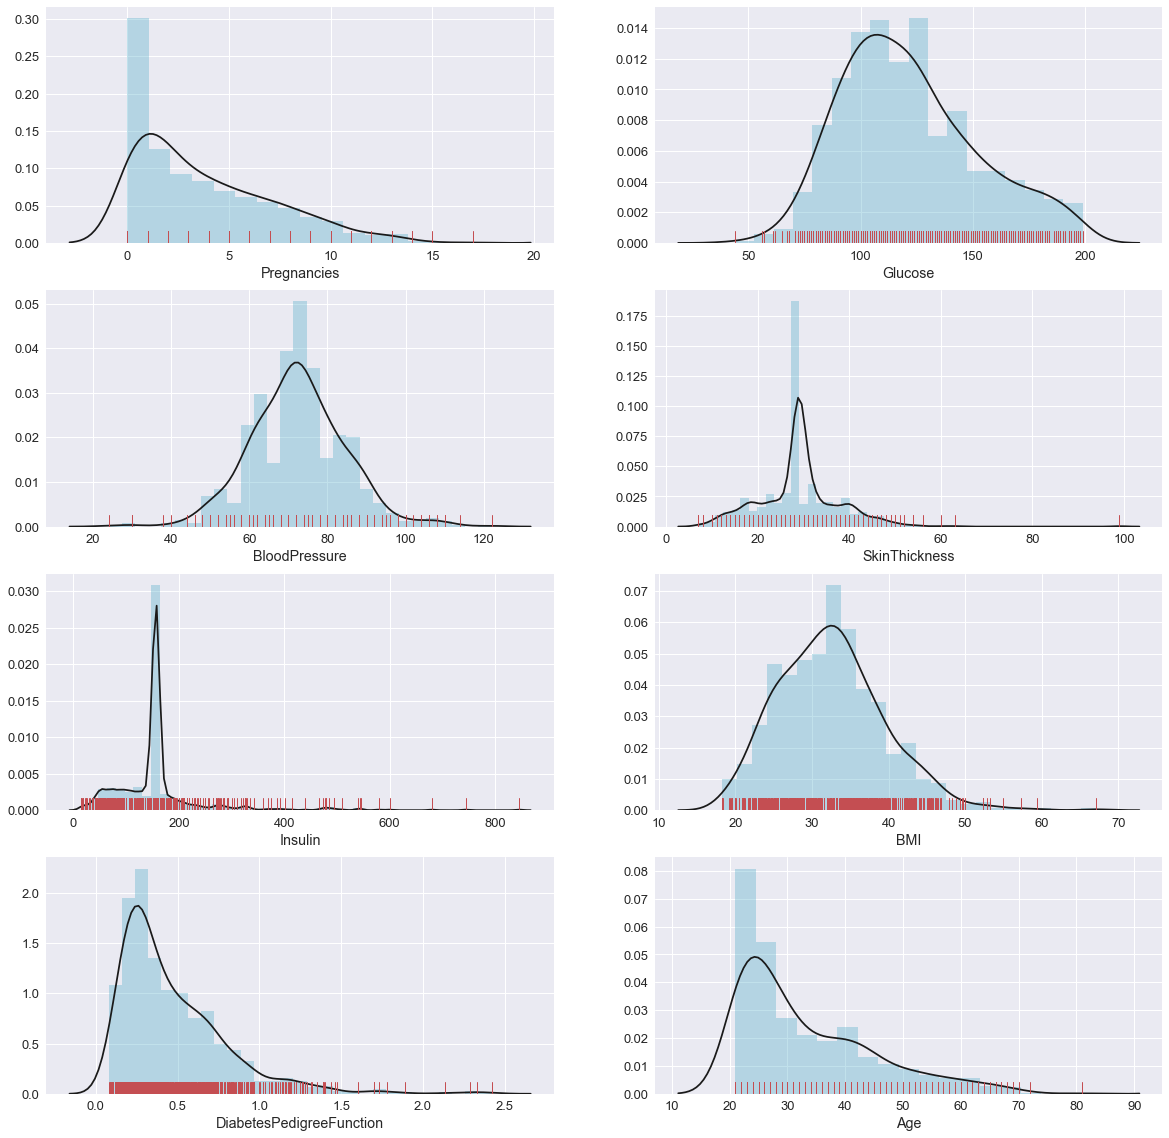

In [20]:
# Check for distribution skewness
plt.figure(figsize=(20,20))
index = 1
for col in pima.columns[:-1]:
    plt.subplot(4,2,index)
    sns.distplot(pima[col], rug=True, kde=True,
                 rug_kws={"color": "r"},
                 kde_kws={"color": "k"},
                 hist_kws={"color": "c"})
    index += 1

**Observations**
>- Histograms are a good graphical visualisation of the data by which we have a better understanding of the various features values distribution: for example we can understand what's the average age of the people or the average BMI etc.
>- ***BloodPressure*** and ***SkinThickness*** appears to be uniform distribution.
>- ***Insulin*** and ***BMI*** are left/negatively skewed and all others are right/positively skewed distribution.
>- ***SkinThickness***, ***Insulin***, ***DiabetesPedigreeFucntion*** and ***Age*** are **exponentially distributed** attributes

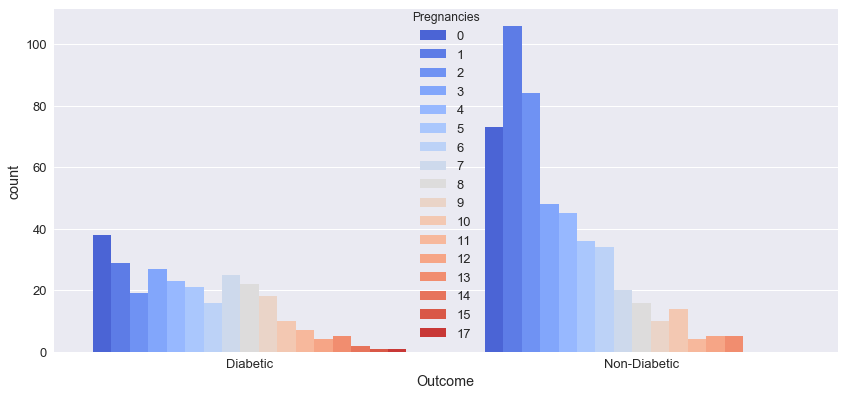

In [21]:
# Check the Target distribution
plt.figure(figsize=(12,6))
sns.countplot('Outcome', data=pima, hue='Pregnancies', palette='coolwarm', saturation=1)
plt.tight_layout()

**Observations**
>- No. of non-diabetic patient's record available is sufficiently more than diabetic.
>- There are more concentration of patients' count in less occassions of pregnancies in both diabetic and non-diabetic category.

### Bivariate Analysis - Predictors vs. Target

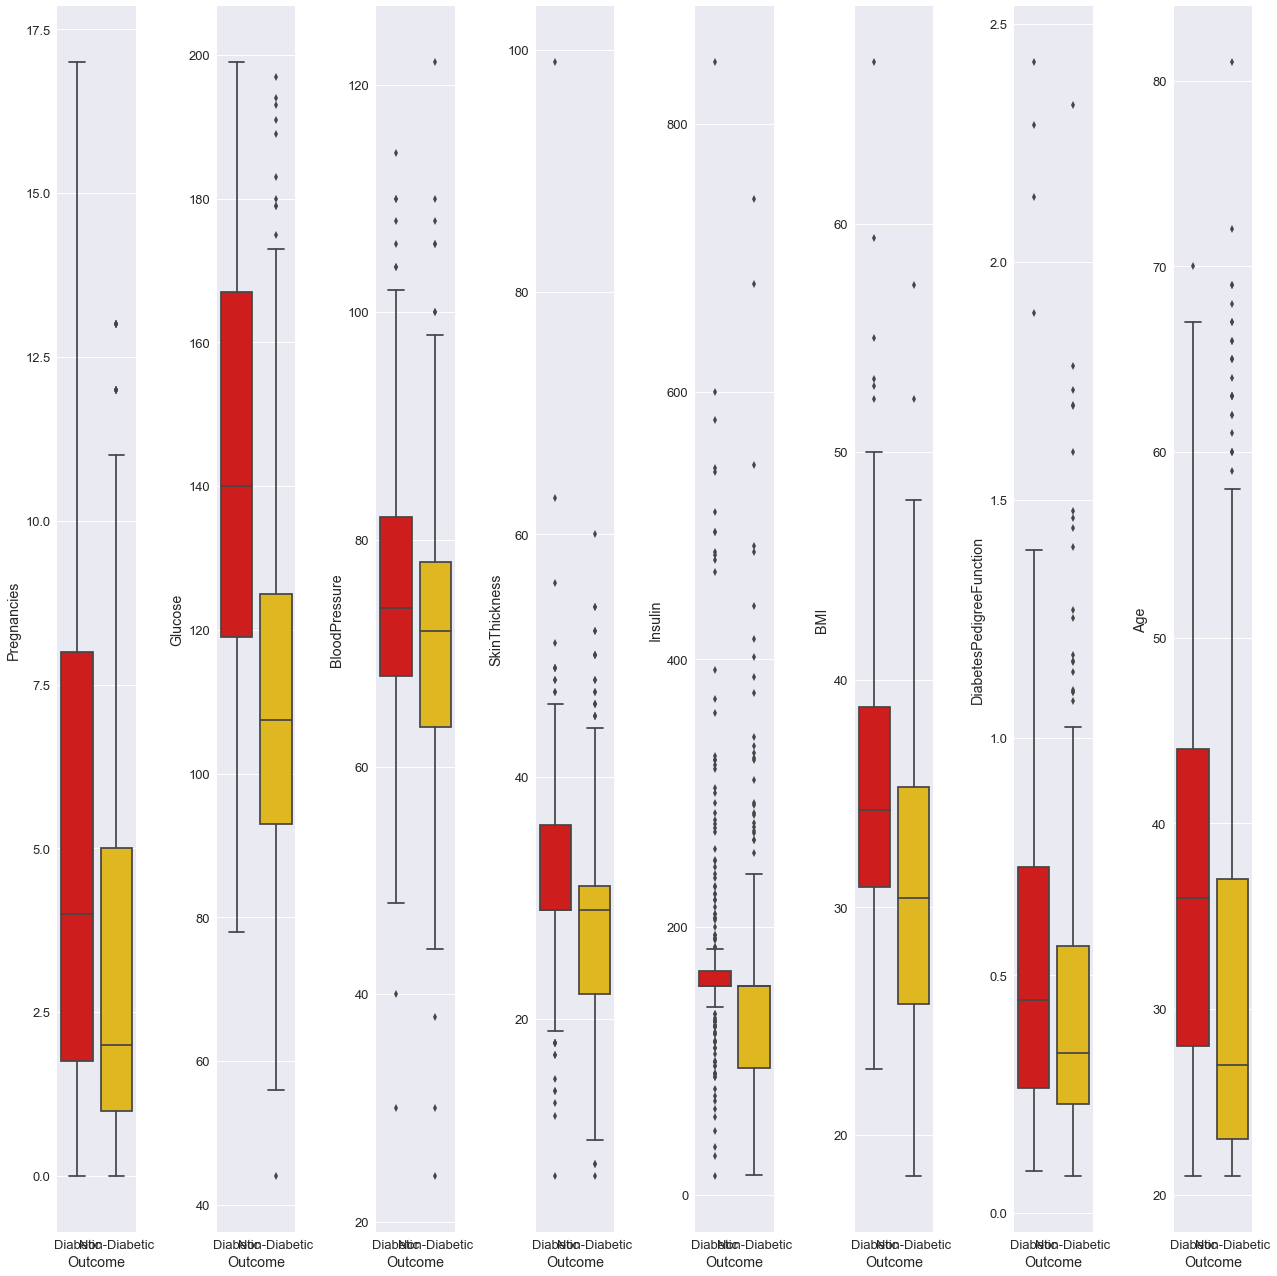

In [22]:
# Check for distribution Central Tendency for different Outcomes
plt.figure(figsize=(18,18))
index = 1
for col in pima.columns[:-1]:
    plt.subplot(1,8,index)
    sns.boxplot(pima['Outcome'], pima[col], palette='hot')
    index += 1
    plt.tight_layout()

**Comments**
>- **Median**: The median is represented by the line inside the box. The median is a common measure of the center of your data. Half the observations are less than or equal to it, and half are greater than or equal to it.
>- **Interquartile range box**: The interquartile range box represents the middle 50%tile of the data. It shows the distance between the first and third quartiles (Q3-Q1).
>- **Whiskers**: The whiskers extend from either side of the box. The whiskers represent the ranges for the bottom 25% and the top 25% of the data values, excluding outliers.

**Observations**
>- Except for *Pregnencies* all other attributes contain outliers. Pregnancies has only two outliers in Non-Diabetic category
>- *Glucose* has no outliers in Diabetic category
>- *Pregnencies*, *Glucose* and *Age* have relatively taller boxplots than others. This indicates that data is widely spread for these atributes
>- All other predictors have comparatively concentrated data spread although they contains outliers.

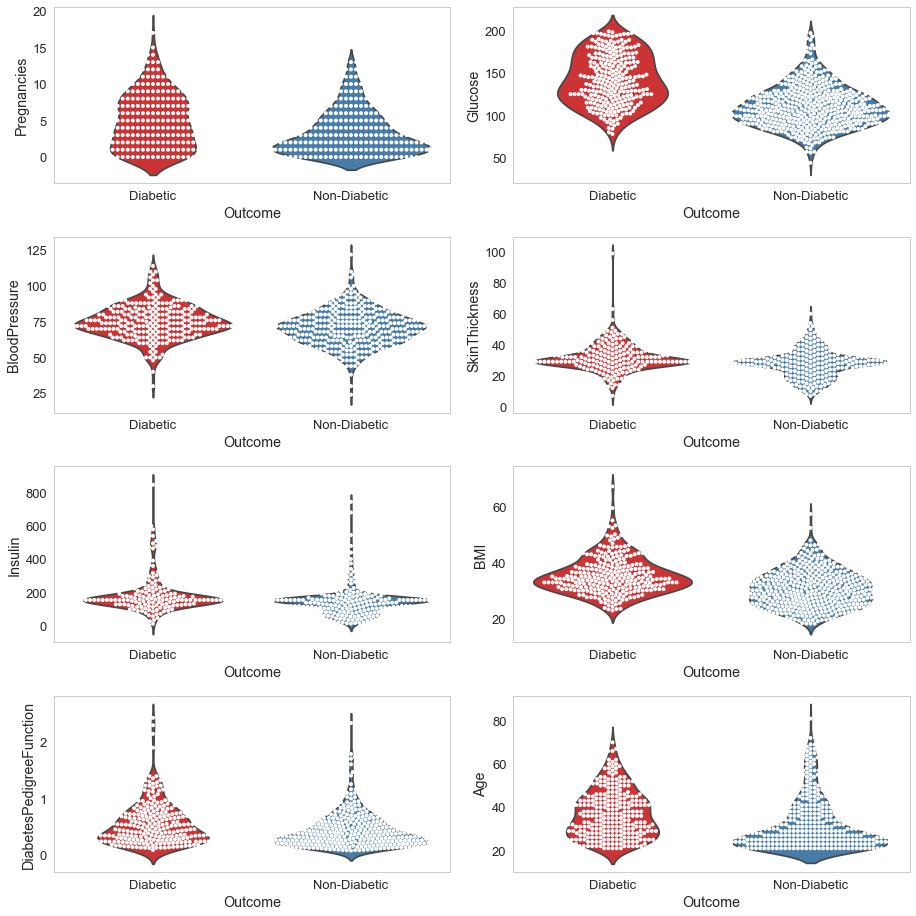

In [23]:
# Check for spread of Predictors in each of the Outcome category
plt.figure(figsize=(13,13))
sns.set_style('whitegrid', {'axes.grid' : False})
index = 1
for col in pima.columns[:-1]:
    plt.subplot(4,2,index)
    sns.violinplot(pima['Outcome'], pima[col], inner=None, palette='Set1')
    sns.swarmplot(pima['Outcome'], pima[col], color="white", edgecolor="gray", size=4)
    index += 1
    plt.tight_layout()

**Observations**
>- The relationship of *Pregnancies* and *Outcome* shows that patients are more prone to being diabetic if the no of occasions of pregnancies increses.
>- Simillarly *Insulin*, *BMI*, *DiabetesPedigreeFunction* has linear affinity towards being diabetic. More the value of these attributes, more is the chance for developing type 2 diabetes.
>- **Pregnancies** and **DiabetesPedigreeFuction** seems to be good predictors for diabetes.
>- Age~Outcome plot indicates that *Non-Diabetic persons tend to live more than the diabetic persons*.
>- *Diabetic persons tend to develop low BloodPressure.*
>- *Glucose* content tend to be present more in case of Diabetic patients.

In [24]:
# Reset the Seaborn's asthetic
sns.set_style('darkgrid', {'axes.grid' : True})

### Bivariate Analysis - Relationship between various Predictors

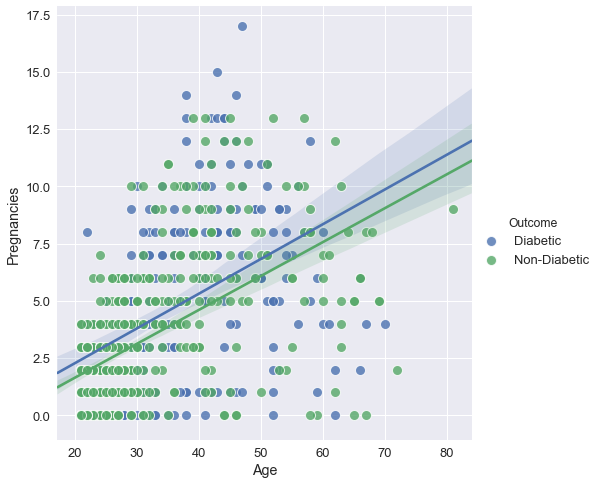

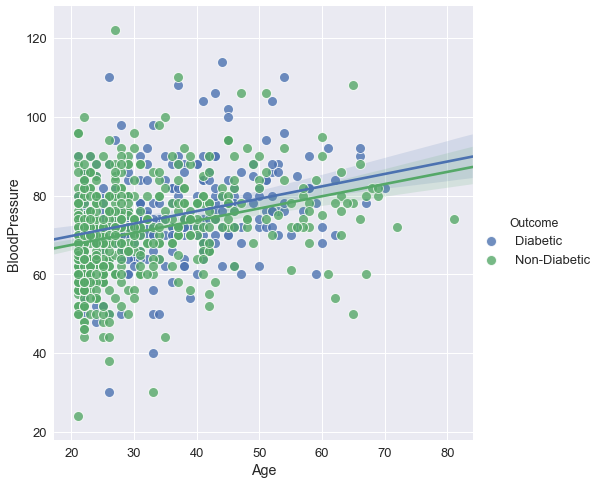

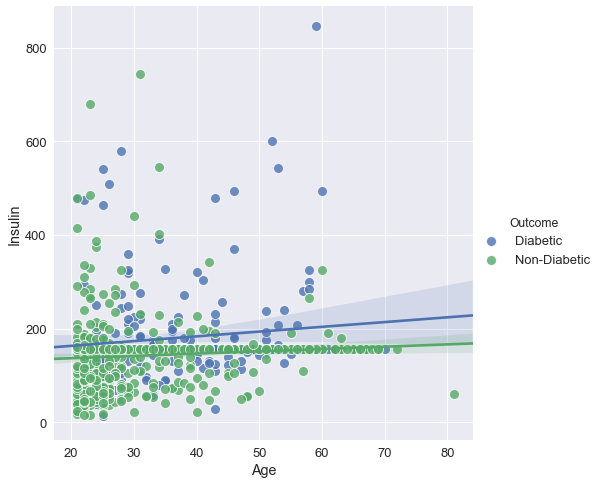

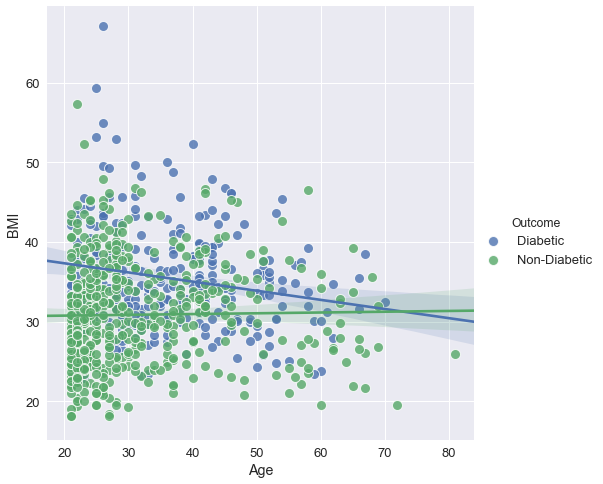

In [25]:
# How Insulin and BloodPressure behave with increase in Age for each of the Outcome category
for attr in ['Pregnancies','BloodPressure','Insulin','BMI']:
    sns.lmplot('Age', attr, data=pima, hue='Outcome', size=7, 
               scatter_kws={'linewidths':1,'edgecolor':'w','s':100})

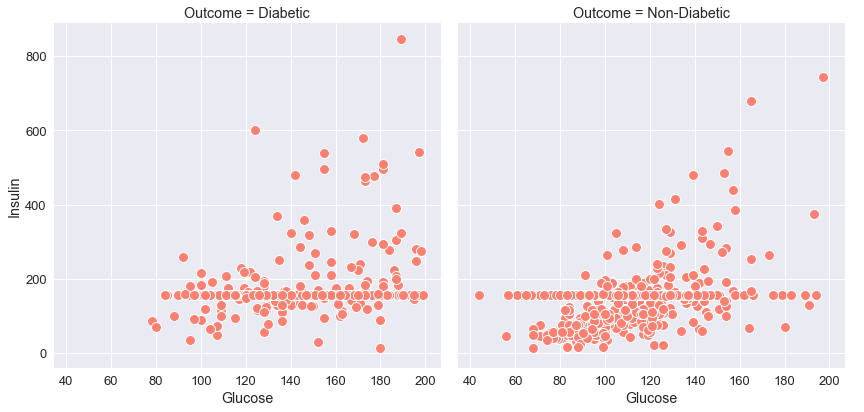

In [26]:
# How BloodPressure and Insulin changes in the body with in crease
grid = sns.FacetGrid(pima, col='Outcome', size=6)
grid.map(plt.scatter, 'Glucose', 'Insulin', 
         edgecolor="w", color='salmon', s=100, lw=1).add_legend()

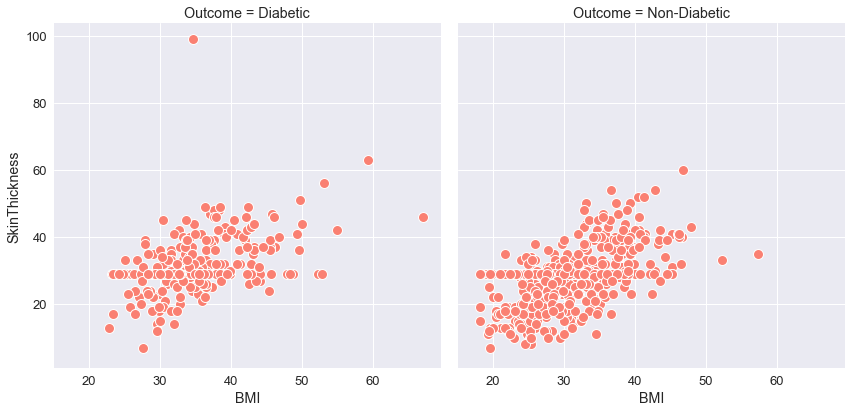

In [27]:
# How BloodPressure and Insulin changes in the body with in crease
grid = sns.FacetGrid(pima, col='Outcome', size=6)
grid.map(plt.scatter, 'BMI', 'SkinThickness', 
         edgecolor="w", color='salmon', s=100, lw=1).add_legend()

D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


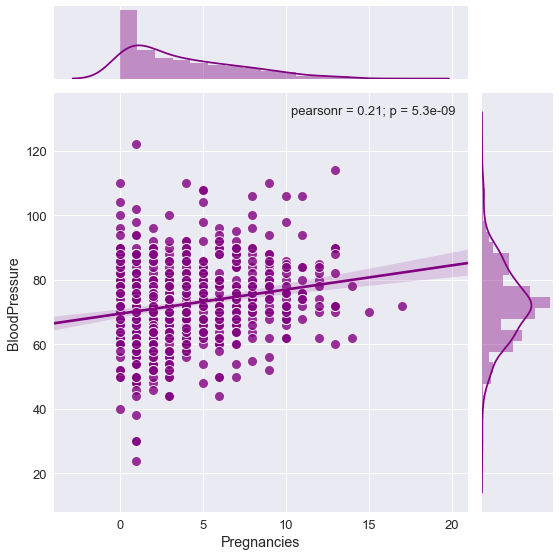

In [28]:
# Glucose vs. Insulin
sns.jointplot(pima['Pregnancies'], pima['BloodPressure'], kind='reg', size=8, color='purple',
             scatter_kws={'linewidths':1,'edgecolor':'w','s':100})

D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


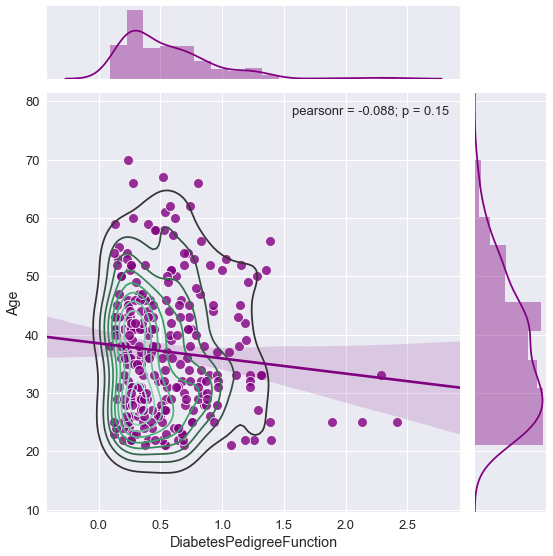

In [29]:
# DiabetesPedigreeFunction vs. Age for Diabetic patients
sns.jointplot('DiabetesPedigreeFunction', 'Age', data=pima[pima['Outcome']=='Diabetic'], kind='reg', size=8, color='purple',
             scatter_kws={'linewidths':1,'edgecolor':'w','s':100}).plot_joint(sns.kdeplot)

D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


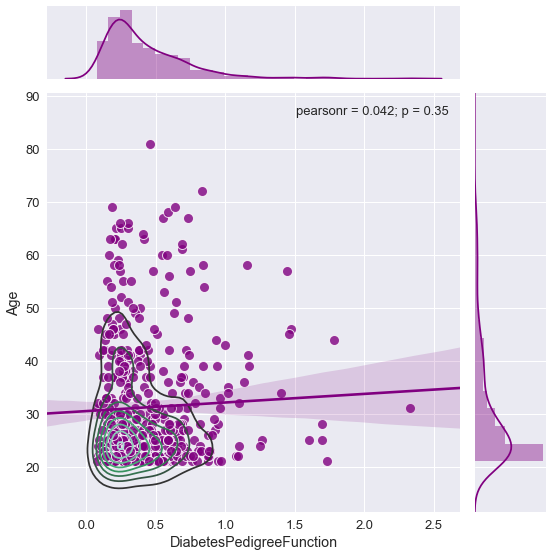

In [30]:
# DiabetesPedigreeFunction vs. Age for Non-Diabetic patients
sns.jointplot('DiabetesPedigreeFunction', 'Age', data=pima[pima['Outcome']=='Non-Diabetic'], kind='reg', size=8, color='purple',
             scatter_kws={'linewidths':1,'edgecolor':'w','s':100}).plot_joint(sns.kdeplot)

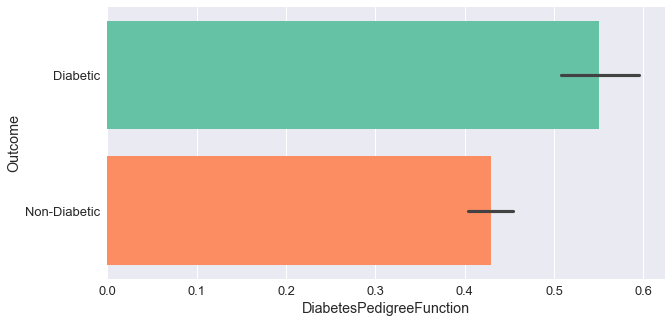

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(pima['DiabetesPedigreeFunction'], pima['Outcome'], palette='Set2', saturation=1.5)

**Observations**
>- The relationship of **Age** vs. various other predictors shows that ***Pregnancies*, *BloodPressure* are directly propertional to Age, no matter patients are Diabetic or not**.
>- *BMI* of Diabetic person decreses with increses in Age where as for a Non-Diabetic person it tend to be almost constant. **This implies that Diabetic person looses healthy growth as he ages gradually**.
>- ***Insulin* fluctuation is more observed in Diabetic patients** as compared to Non-Diabetic as it is directly propertion with Glucose concentration in Plasma test.
>- ***SkinThickness* directly contributes to *BMI* irrespective of the Outcome**.
>- Hence **Insulin & Glucose** and **SkinThickness & BMI** are **strongly coupled attributes**. We can get rid of any one of each pair to reduce redundancy.
>- ***DiabetesPedigreeFunction*** is the metric of diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient. It is noticed to have a direct impact on the age of the patient live for. **Patients with stronger pedi function tend to suffer more in diabetes and live for lesser years**.
>- **There is no obvious relationship between age and onset of diabetes**.

### Multivariate Analysis - Pairwise relatioship of all Predictors

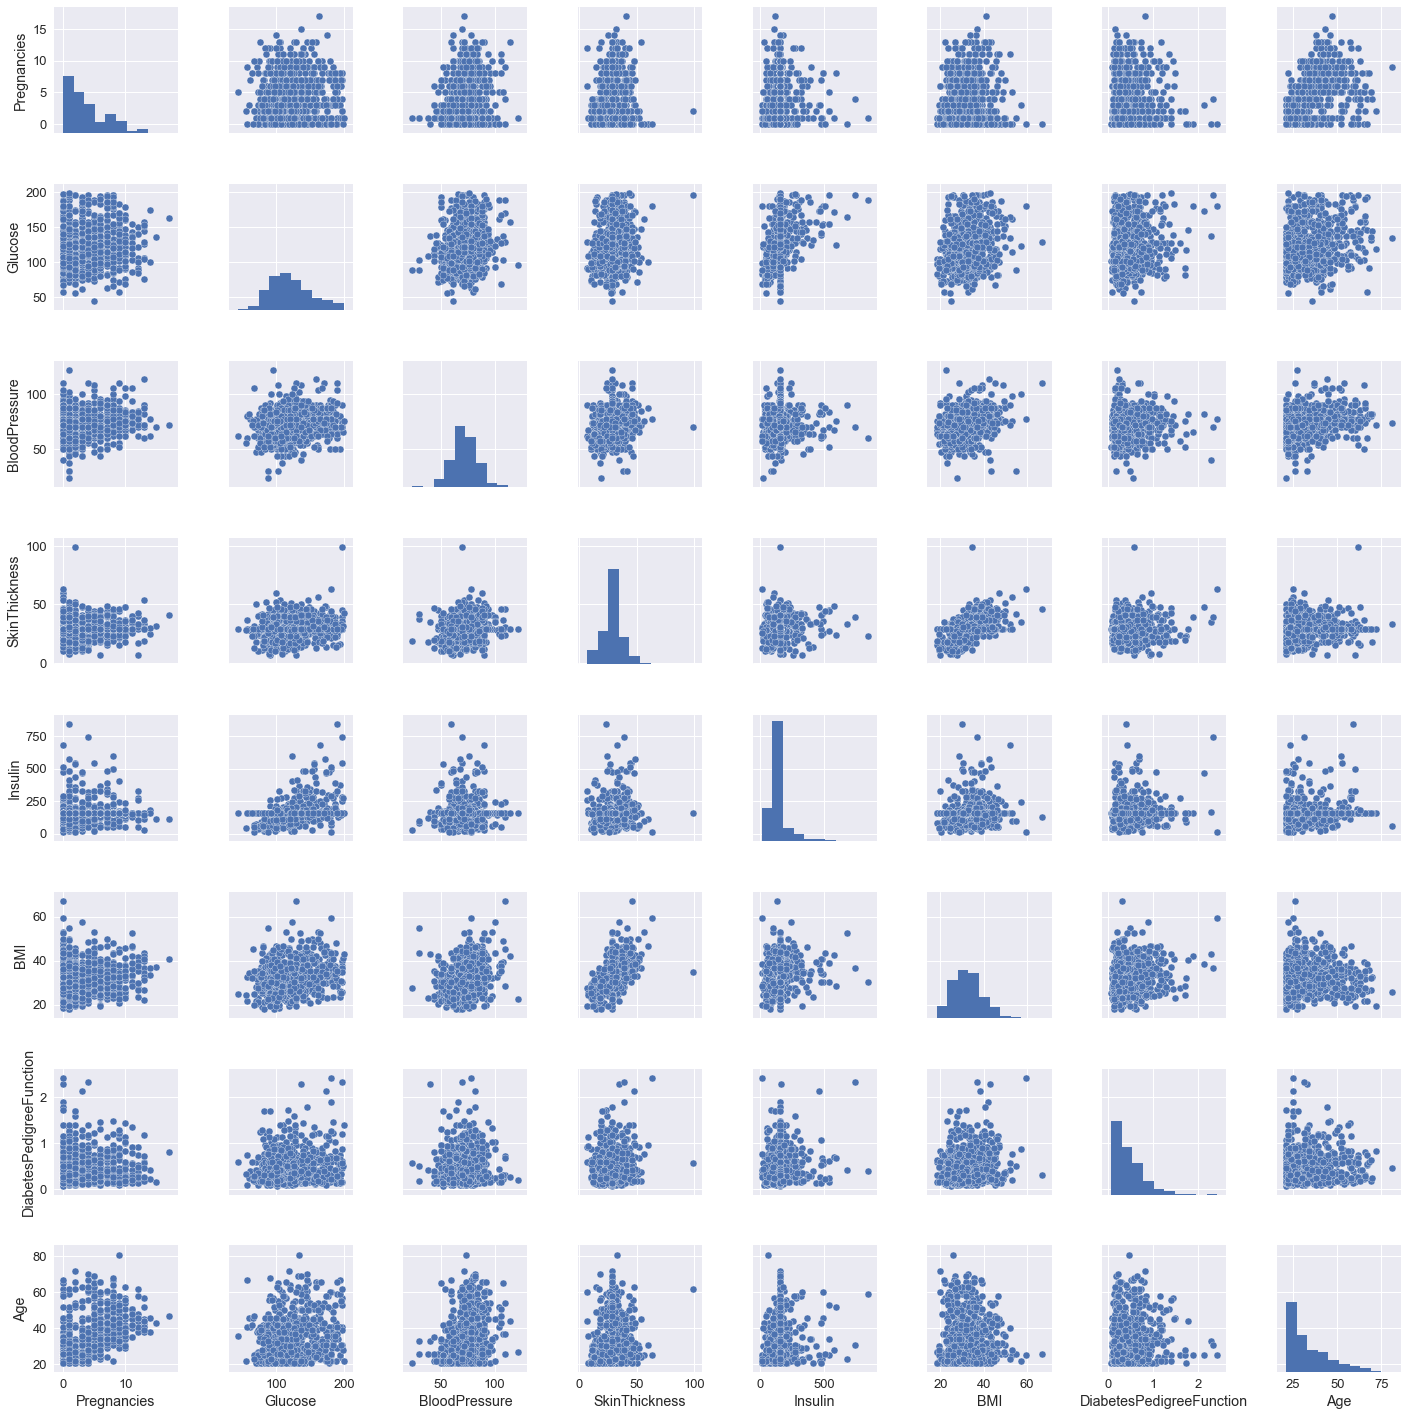

In [32]:
# Pairwise relationship
sns.pairplot(pima)

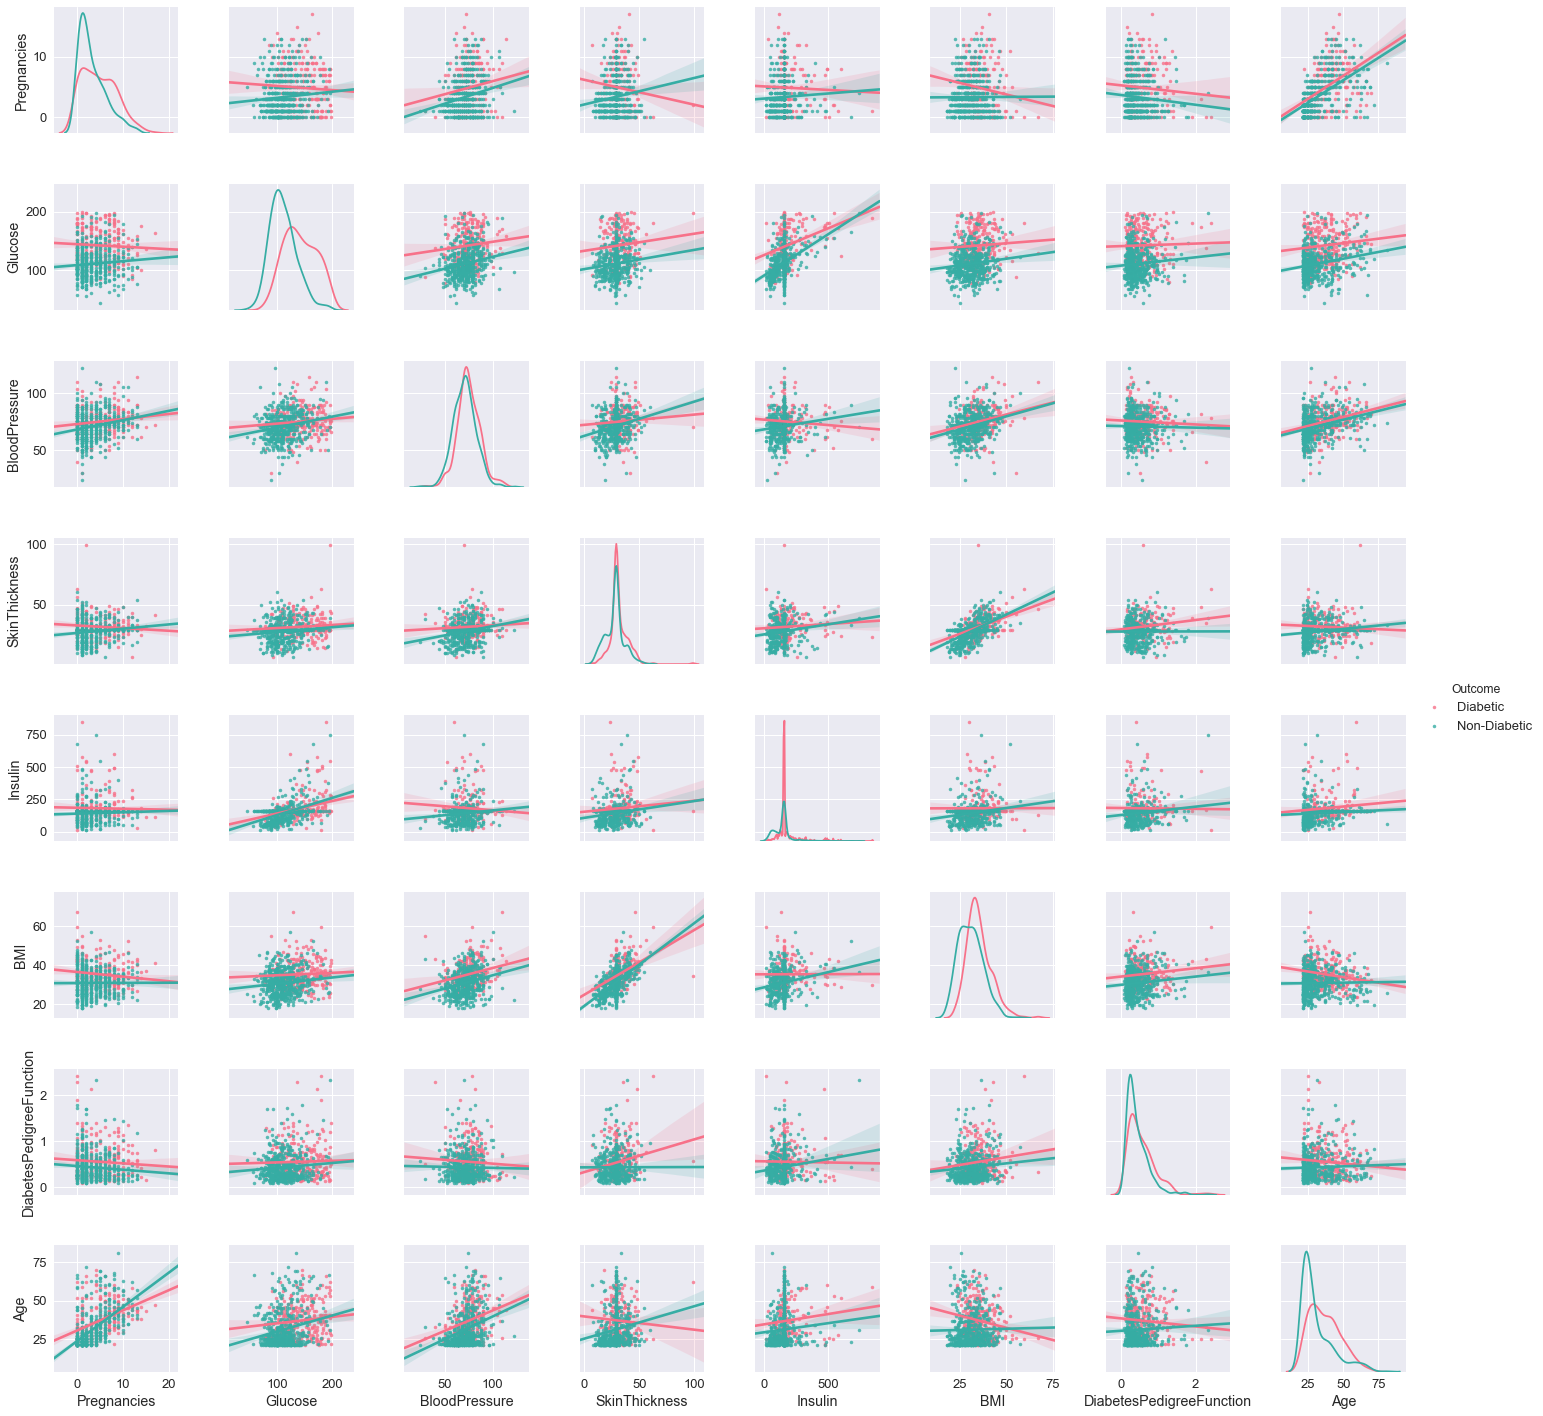

In [33]:
# Pairwise relationship in each of the category of Outcome
sns.pairplot(pima, hue='Outcome', kind='reg', diag_kind='kde', palette='husl', markers='.')

**Comments**
> Pair plot is built on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship between two variables.

**Observations**
>- **Increase in no of occasions of *Pregnancies*, reduces the BMI thus SkinThickness, Glucose and Insulin level for a Diabetic patient**. Which is quite **opposite in case of Non-Diabetic patient**.
>- Simillarly with the **increase in Age, reduces the BMI and SkinThickness for Diabetic patient**. Which is quite **opposite in case of Non-Diabetic patient**.
>- **Diabetic patients tend to have low BloodPressure compared to Non-Diabetic patient**.

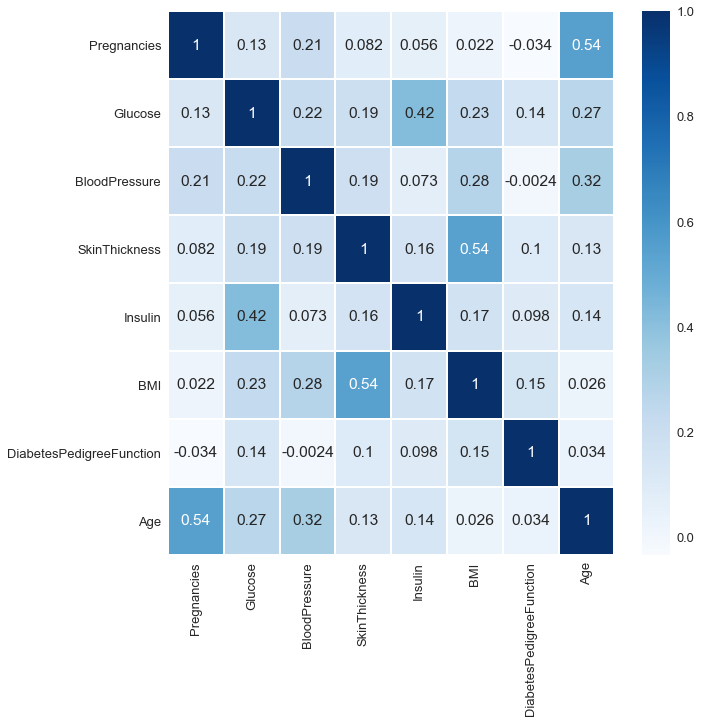

In [34]:
# Visualize the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(pima.corr(), annot=True, cmap='Blues', linewidths=1)

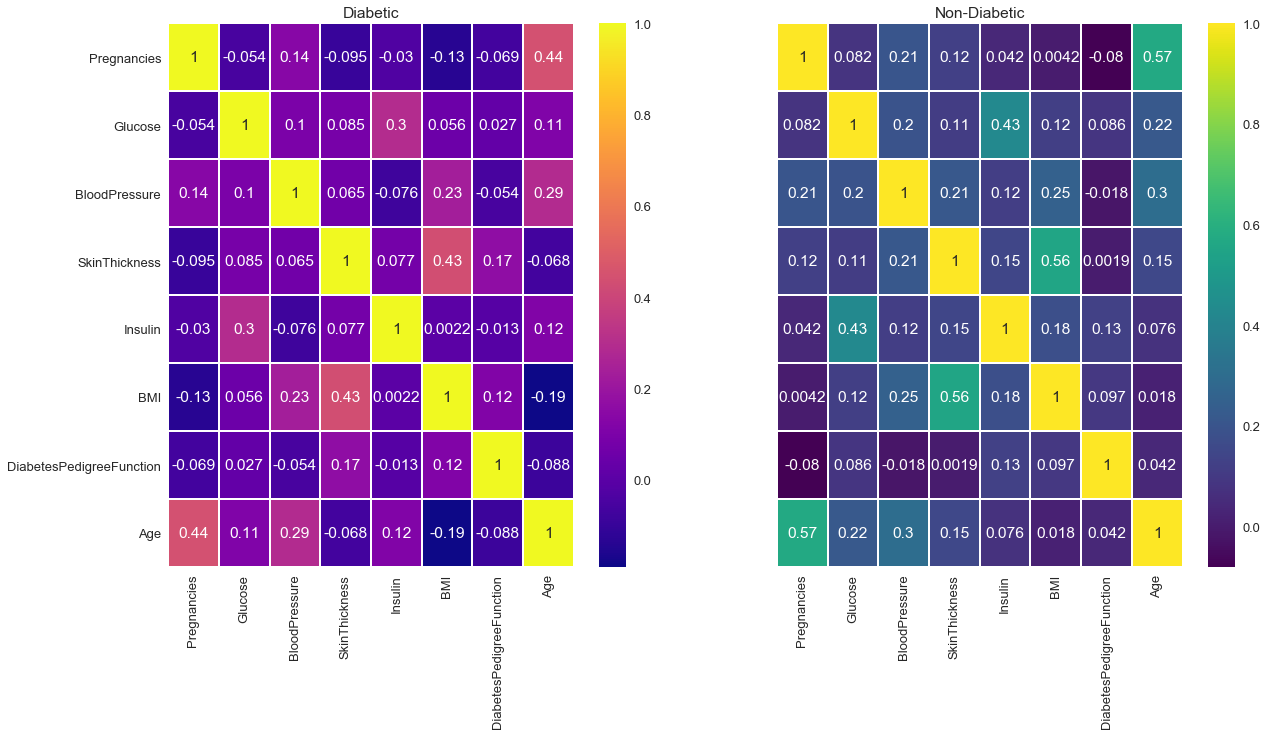

In [35]:
# Visualize the correlation matrix in each Outcomes category
f, axes = plt.subplots(ncols=2, sharey=True, figsize=(20,10))
axes[0].set_title('Diabetic')
sns.heatmap(pima[pima['Outcome']=='Diabetic'].corr(), annot=True, cmap='plasma', linewidths=1, ax=axes[0])
axes[1].set_title('Non-Diabetic')
sns.heatmap(pima[pima['Outcome']=='Non-Diabetic'].corr(), annot=True, cmap='viridis', linewidths=1, ax=axes[1])

**Observation**
>- This indicates Glucose and Insulin are positively correlated with **Perarson's correlation coefficient of 0.42** which shows that patients with *higher Glucose level tend to have higher Insulin reading*
>- However, when categorized among outcomes, these two factors are more corelated for Non-Diabetic(0.43) than Diabetic(0.3) patients.
>- Glucose and BloodPressure tend to be correlated with Age. It indicates that **with increase in the Age of a patient, Glucose and BloodPressure level increses**.
>- The heatmap here proves that *BMI, SkinThickness and Glucose* possess opposite relationship with *Pregnancies* in two different outcomes.

## Log Transformation
A normal distribution allows the researcher to make more accurate predictions about a population if the underlying distribution is known. Skewness is when a distribution deviates from this, i.e. a deviation could be positively or negatively skewed. Such a distribution possesses a fluctuated variance (σ) while most of the tests require the distribution to be statistically close and have a constant variance. 

We apply various transformation techniques to handle such exponentially skewed data. *``Log Transformation``* is more popular among them. The outcomes of Log transformation are
>1. ***Stabilizes the variance***
>2. ***Compresses the range of data***
>3. ***Makes the data Normally distributed***

Our dataset contains *SkinThickness, Insulin, DiabetesPedigreeFunction* and *Age* predictors to have exponentially skewed distribution. We apply **Log2 Transformation provided by Numpy** on these predictors.

In [36]:
# Describe the transformed attributes
pima_log2 = np.log2(pima[['SkinThickness','Insulin','DiabetesPedigreeFunction','Age']])
pima_log2.describe()

,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000
mean,4.792418,7.106425,-1.384901,4.975570
std,0.472938,0.742544,0.929560,0.465561
min,2.807355,3.807355,-3.680382,4.392317
25%,4.643856,6.924776,-2.036528,4.584963
50%,4.857981,7.285402,-1.424699,4.857981
75%,5.000000,7.285402,-0.675190,5.357552
max,6.629357,9.724514,1.275007,6.339850


D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axe

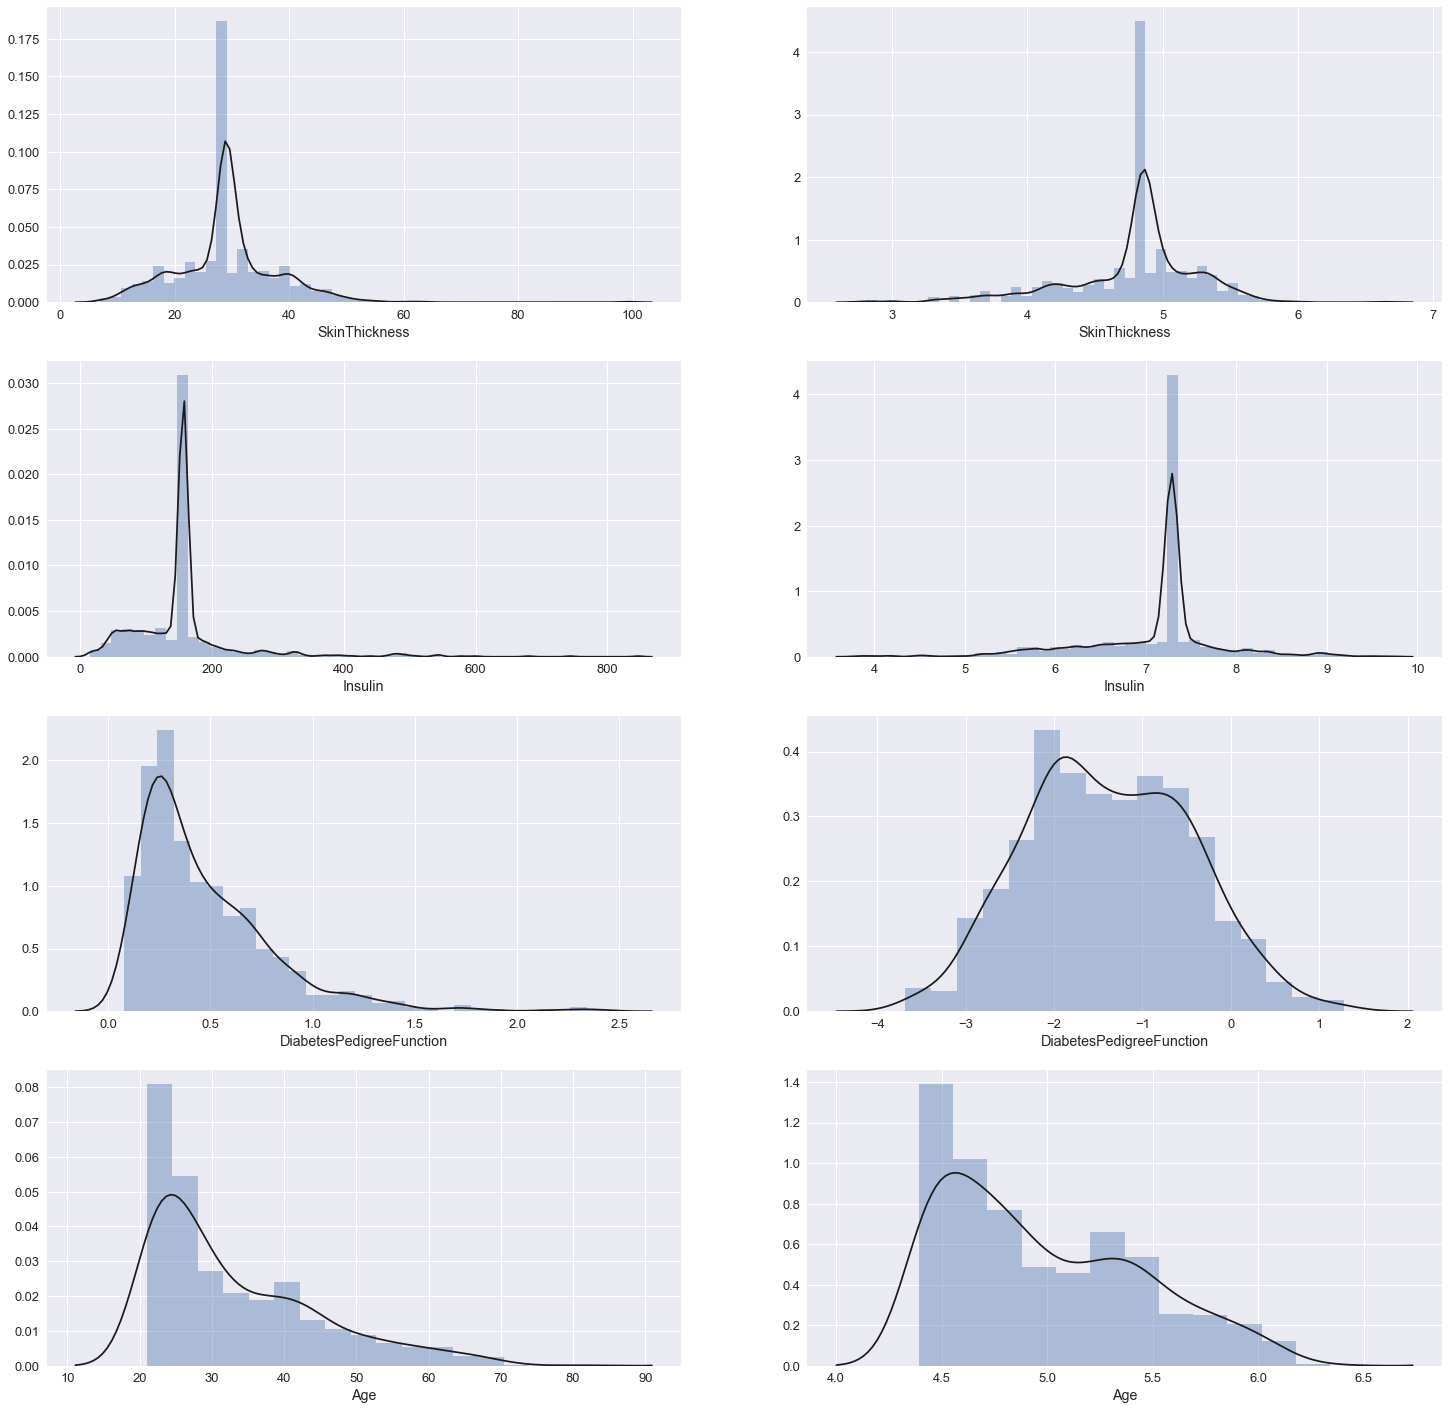

In [37]:
# Plot the distribution for raw vs. transformed data
plt.figure(figsize=(25,25))
index = 0
for col in pima_log2.columns:
    for s in [1,2]:
        plt.subplot(4,2,s+index)
        distro = pima[col] if s == 1 else pima_log2[col]
        sns.distplot(distro, kde=True,
                     kde_kws={"color": "k"},
                     hist_kws={"color": "b"})
    index += 2